### Imports

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


### Loading data

In [8]:
red_df_raw = pd.read_csv('./wine+quality/winequality-red.csv', sep = ';')
red_df_raw

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [9]:
white_df_raw = pd.read_csv('./wine+quality/winequality-white.csv', sep = ';')
white_df_raw

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

### Observations:
* 4898 white wine observations and 1598 red wine observations
* Fixed acidity: continuous (maybe ordinal catagorical)
* Volatile acidity: continuous
* Citric acid: continuous
* Residual sugar: continuous
* Chlorides: continuous
* Free sulfur dioxide: continuous (integers)
* Total sulfur dioxide: continuous (integers)
* Density: continuous
* pH: continuous
* Sulphates: continuous
* Alcohol: continuous
* Quality: ordinal catagorical

# Red Wine

In [11]:
red_df_raw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [12]:
white_df_raw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Red wine dataset EDA

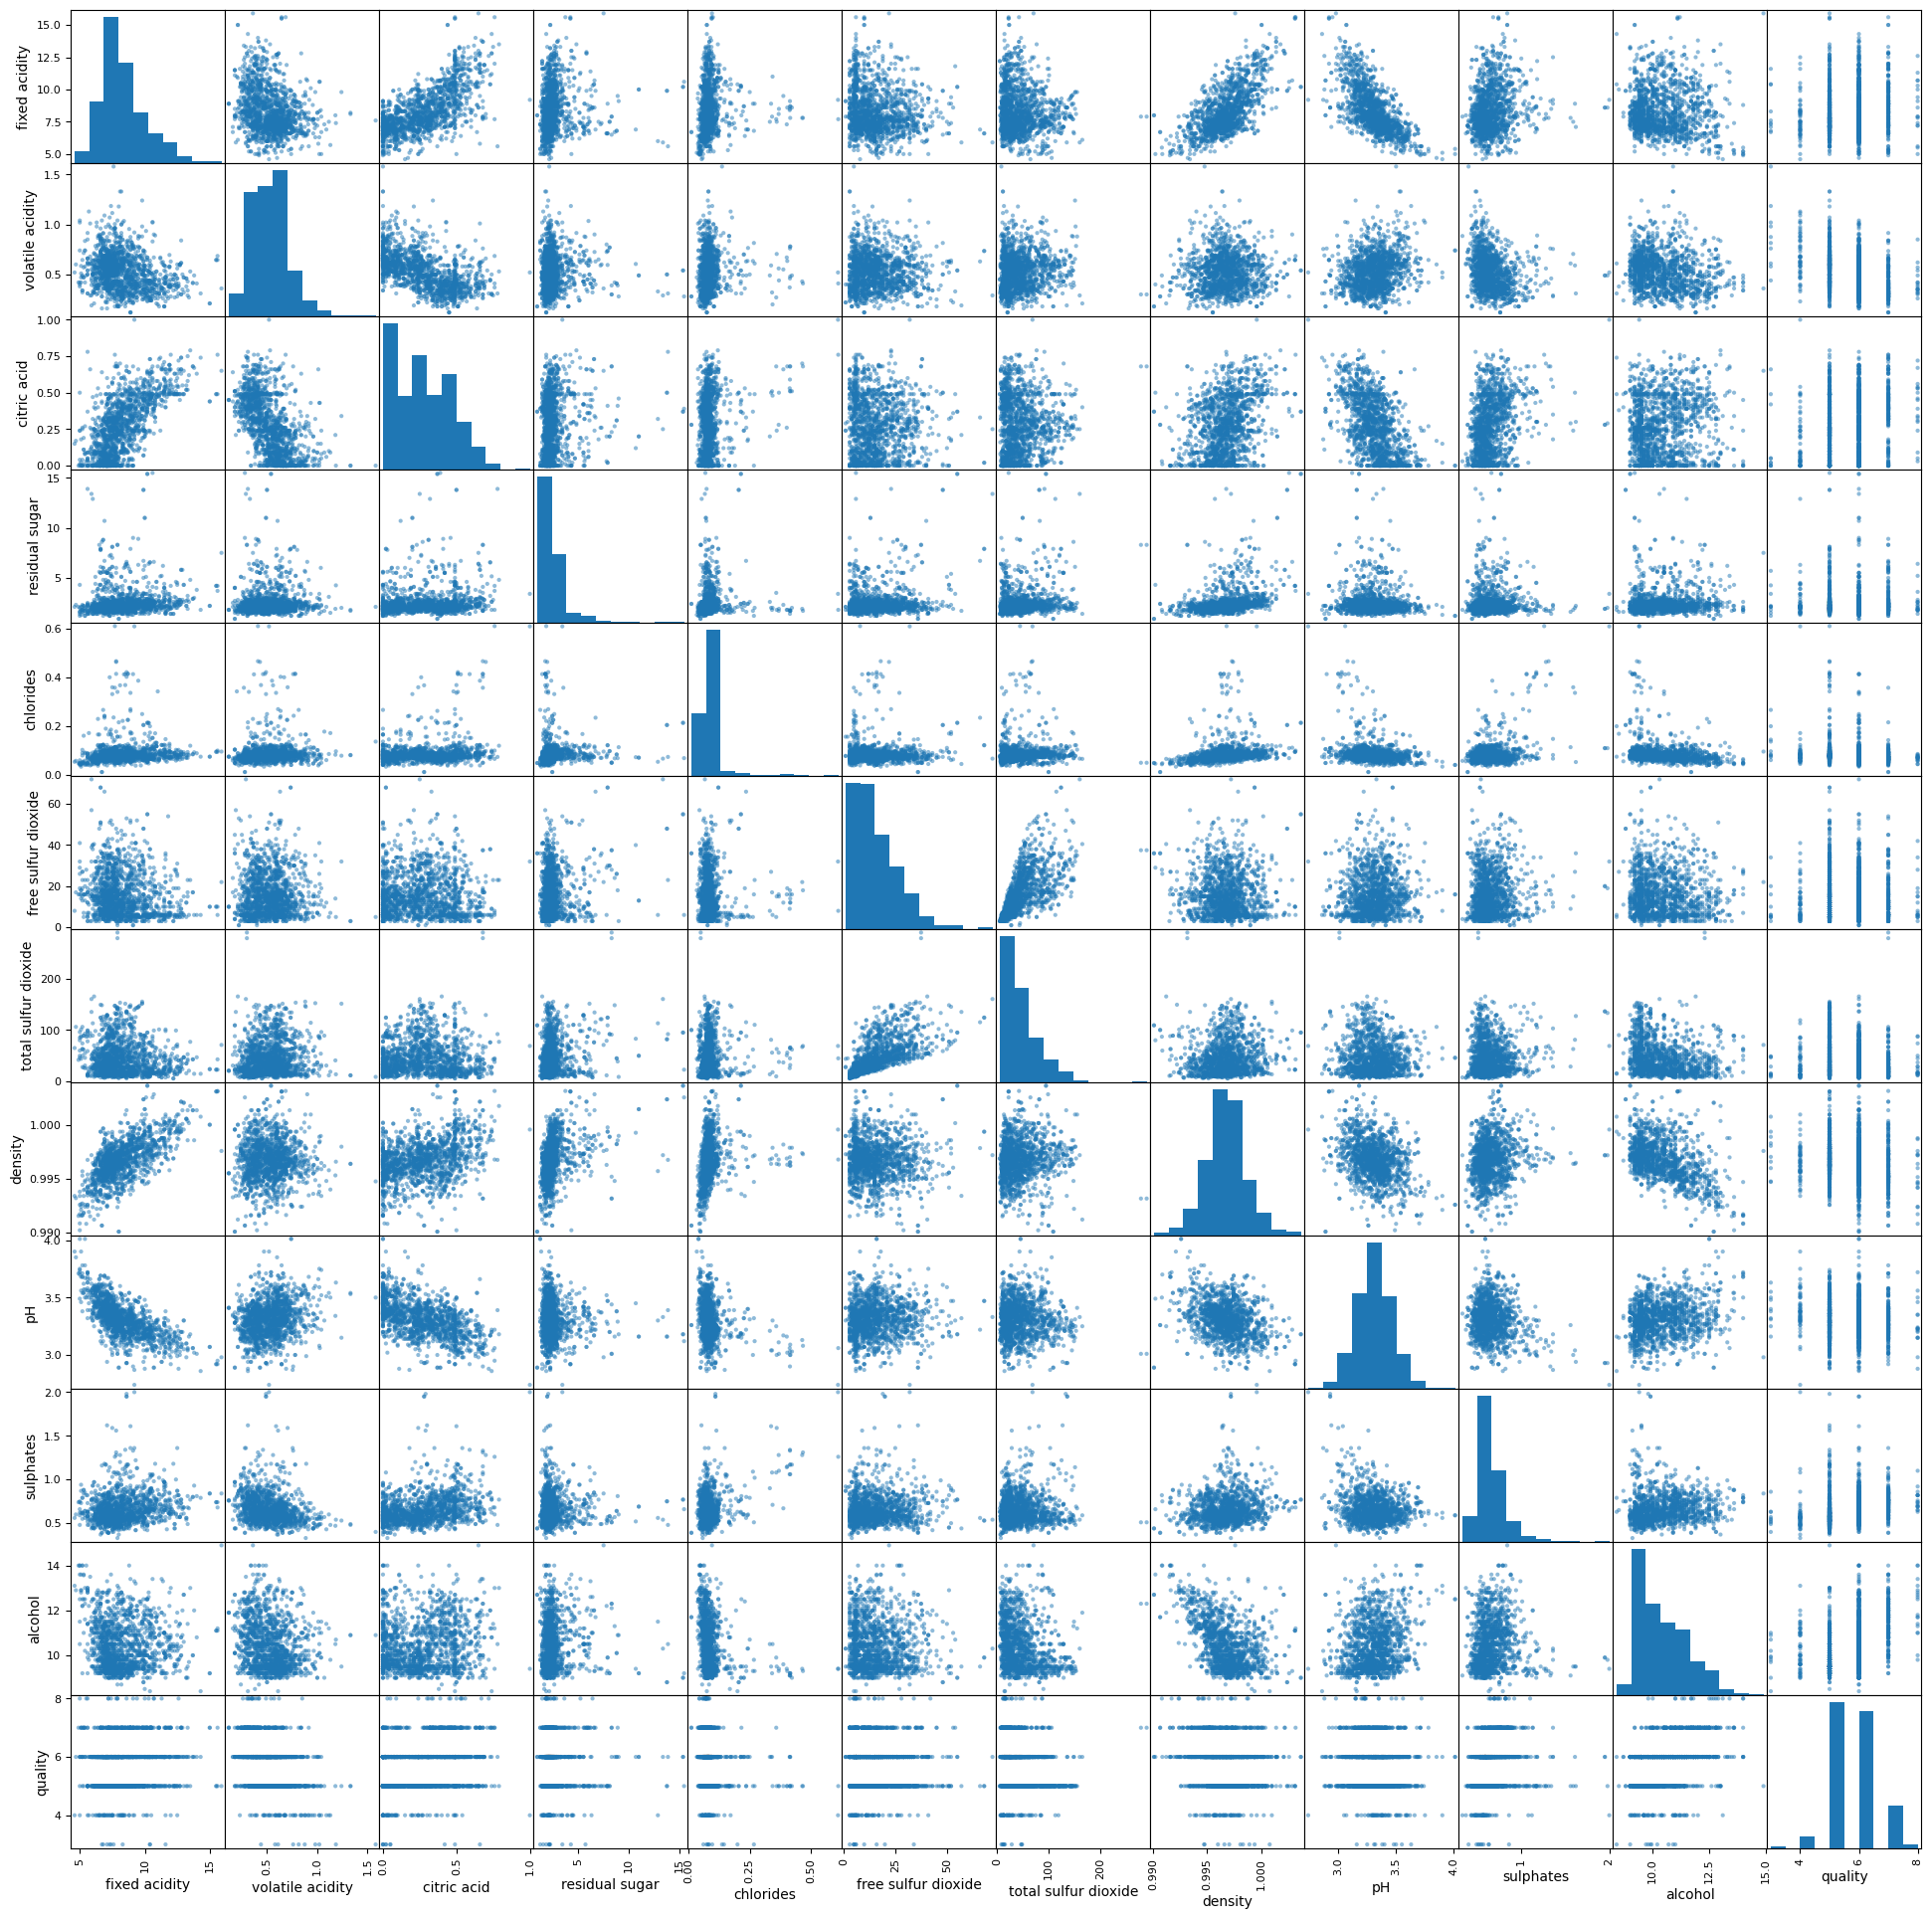

In [17]:
pd.plotting.scatter_matrix(red_df_raw, figsize = (24, 24));

In [21]:
redCorrMatrix = red_df_raw.corr(numeric_only=True)
redCorrMatrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

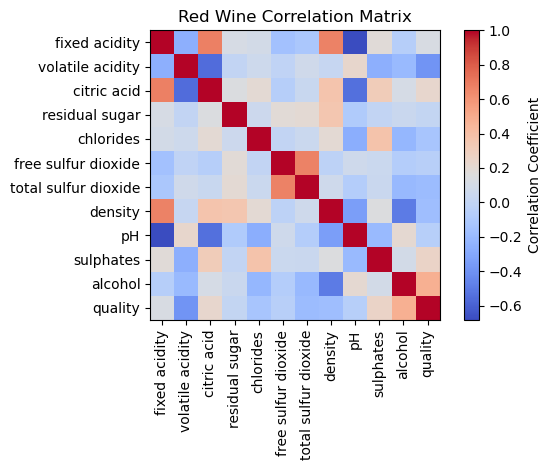

In [23]:
plt.imshow(redCorrMatrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(redCorrMatrix.columns)), redCorrMatrix.columns, rotation=90)
plt.yticks(range(len(redCorrMatrix.columns)), redCorrMatrix.columns)
plt.title('Red Wine Correlation Matrix')
plt.tight_layout()
plt.show()

### Observations
The factors that are the most correlated to quality in order of magnitude are:
* alcohol (0.476166)
* volatile acidity (-0.390558)
* sulphates (0.251397)
* citric acid (0.226373)
* total sulfur dioxide (-0.185100)
* density (-0.174919)
* chlorides (-0.128907)
* fixed acidity (0.124052)
* pH (-0.057731)
* free sulfur dioxide (-0.050656)
* residual sugar (0.013732)

Before we begin, it is important to test for collinearity within our variables. If there is collinearity we can do some feature engineering or drop all but one of the collinear variables.

### Testing for Collinearity
We can use correlation coefficient to look for pairwise collinearity and VIF for multicollinearity

In [85]:
threshold = 0.6

high_corr = redCorrMatrix[(redCorrMatrix.abs() > threshold) & (redCorrMatrix.abs() < 1.0)]
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')
high_corr

fixed acidity  citric acid  free sulfur dioxide  \
fixed acidity                   NaN     0.671703                  NaN   
citric acid                0.671703          NaN                  NaN   
free sulfur dioxide             NaN          NaN                  NaN   
total sulfur dioxide            NaN          NaN             0.667666   
density                    0.668047          NaN                  NaN   
pH                        -0.682978          NaN                  NaN   

                      total sulfur dioxide   density        pH  
fixed acidity                          NaN  0.668047 -0.682978  
citric acid                            NaN       NaN       NaN  
free sulfur dioxide               0.667666       NaN       NaN  
total sulfur dioxide                   NaN       NaN       NaN  
density                                NaN       NaN       NaN  
pH                                     NaN       NaN       NaN

### Observations
* Even though correlation of fixed acidity and pH is lower than our threshold value of 0.7, we will still choose to drop one of them. This is because it is very close to our threshold, and in theory we know that pH and fixed acidity measure very similar properties of the wine.
* We do this for free/total sulfur dioxide as well as citric acid.
* Another reason to discard is that since they already have low correlations, it is likely not significant to predicting quality

### Feature Selection
We have a few choices including best subset selection, forward stepwise selection, backward stepwise selection and greedy selection.
In this case we choose to use **backward stepwise selection** for a few reasons.
* We have relatively few predictors (only 11), therefore computationally we can afford to start with a full model
* For most of them, the correlation seems to be somewhat high so we expect a large amount of variables to contribute to the final model
* We have n>>p, which means we worry less about overfitting the model

Notes:
We can use best subset selection tbh here, but our main concern is probs gonna be overfitting --> might be able to use adjusted R^2 metric to compensate.

Forward selection here isnt too bad either since we know a lot of the variables we may need to drop due to collinearity concerns.

Greedy selection not bad here either (although still concerned about overfitting but less likely than best subset)

In [50]:
red_train, red_test = train_test_split(red_df_raw, train_size = 0.8)

### Full model

In [51]:
y = red_train['quality']
x = red_train.drop(['quality'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     65.78
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          4.24e-116
Time:                        23:39:51   Log-Likelihood:                -1250.2
No. Observations:                1279   AIC:                             2524.
Df Residuals:                    1267   BIC:                             2586.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   23.4943 

### Observations:
Density has highest p value of 0.409, so we cut it from the next model

In [52]:
y = red_train['quality']
x = red_train.drop(['quality', 'density'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     72.31
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          6.73e-117
Time:                        23:39:54   Log-Likelihood:                -1250.5
No. Observations:                1279   AIC:                             2523.
Df Residuals:                    1268   BIC:                             2580.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3261 

### Observations:
Fixed acidity has highest p value of 0.612, hence we drop it from the next model

In [53]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     80.24
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          1.19e-117
Time:                        23:39:58   Log-Likelihood:                -1251.0
No. Observations:                1279   AIC:                             2522.
Df Residuals:                    1269   BIC:                             2574.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.7832 

### Observations:
Residual sugar has highest p value of 0.434, hence we drop it from the next model

In [54]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     90.34
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          1.21e-118
Time:                        23:40:03   Log-Likelihood:                -1251.0
No. Observations:                1279   AIC:                             2520.
Df Residuals:                    1270   BIC:                             2566.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.7833 

### Observations:
Citric acid has highest p value of 0.288, so we drop it from the next model

In [55]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid'], axis = 1)
x = sm.add_constant(x)

full_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          1.26e-119
Time:                        23:40:06   Log-Likelihood:                -1251.1
No. Observations:                1279   AIC:                             2518.
Df Residuals:                    1271   BIC:                             2559.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6746 

### Observation:
We choose to drop free sulfur dioxide from the model due to collinearity concerns

In [57]:
y = red_train['quality']
x = red_train.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid', 'free sulfur dioxide'], axis = 1)
x = sm.add_constant(x)

final_model = sm.OLS(y, x).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     118.9
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          2.77e-119
Time:                        23:40:33   Log-Likelihood:                -1254.4
No. Observations:                1279   AIC:                             2523.
Df Residuals:                    1272   BIC:                             2559.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5233 

In [69]:
x_test = red_test.drop(['quality', 'density', 'fixed acidity', 'residual sugar', 'citric acid', 'free sulfur dioxide'], axis = 1)
x_test = sm.add_constant(x_test)
y_test = red_test['quality']
pred = final_model.predict(x_test)
r2_score(y_test, pred)

0.3474128372356138

### Assumption checking
First up, we check relationship between alcohol and quality

/var/folders/st/vt6hxj_93517y4vp9mxflvn80000gn/T/ipykernel_31937/549868520.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(alcohol_quality, labels=quality_levels, patch_artist=True,


Text(0, 0.5, 'Alcohol')

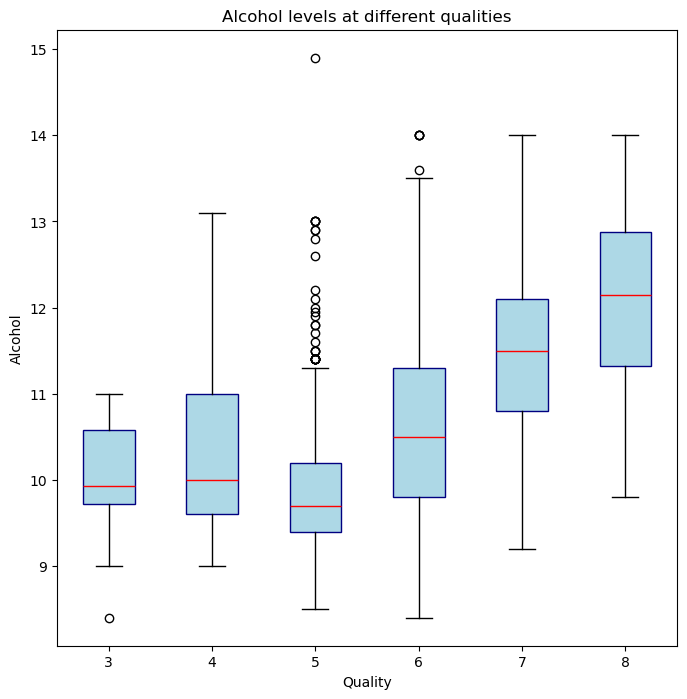

In [ ]:
quality_levels = sorted(red_df_raw['quality'].unique())
alcohol_quality = [red_df_raw.loc[red_df_raw['quality'] == q, 'alcohol'] for q in quality_levels]

fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(alcohol_quality, labels=quality_levels, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='navy'),
           medianprops=dict(color='red'));
ax.set_title('Alcohol levels at different qualities')
ax.set_xlabel('Quality')
ax.set_ylabel('Alcohol')

### Observations:
Alcohol content at different qualities seems to be normally distributed from visual box plot check. To further verify, lets look at the qq plots

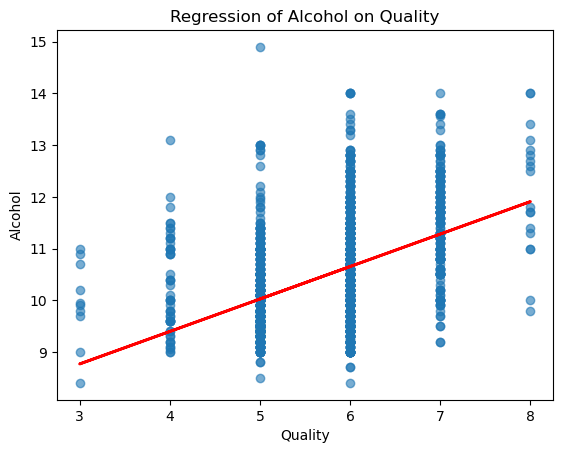

In [102]:
X = sm.add_constant(red_df_raw[['quality']])
y = red_df_raw['alcohol']
model = sm.OLS(y, X).fit()
residuals = model.resid
plt.scatter(red_df_raw['quality'], red_df_raw['alcohol'], alpha=0.6)
plt.plot(red_df_raw['quality'], model.predict(X), color='red', linewidth=2)
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.title("Regression of Alcohol on Quality")
plt.show()

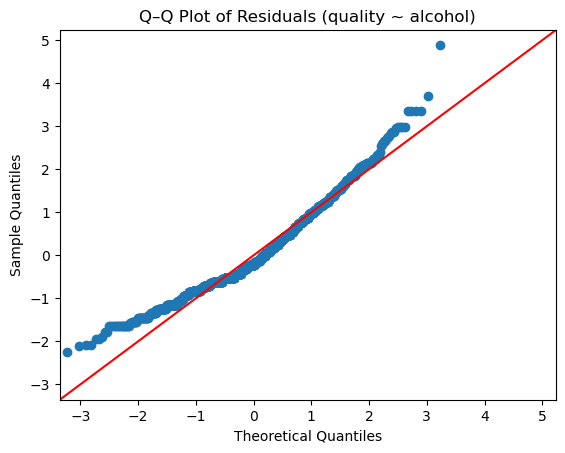

In [103]:
sm.qqplot(residuals, line='45')
plt.title("Q–Q Plot of Residuals (quality ~ alcohol)")
plt.show()

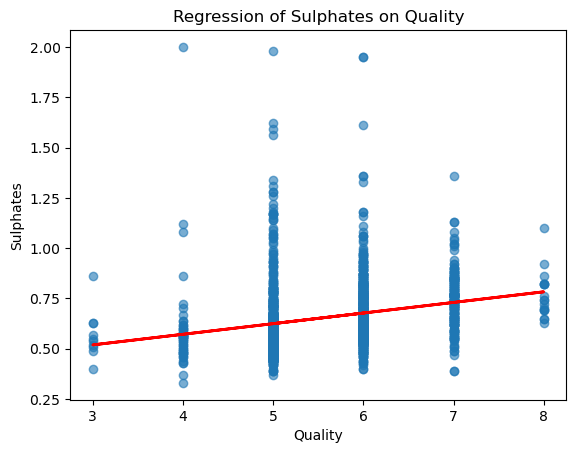

In [113]:
X = sm.add_constant(red_df_raw[['quality']])
y = red_df_raw['sulphates']
model = sm.OLS(y, X).fit()
residuals = model.resid
plt.scatter(red_df_raw['quality'], red_df_raw['sulphates'], alpha=0.6)
plt.plot(red_df_raw['quality'], model.predict(X), color='red', linewidth=2)
plt.xlabel("Quality")
plt.ylabel("Sulphates")
plt.title("Regression of Sulphates on Quality")
plt.show()

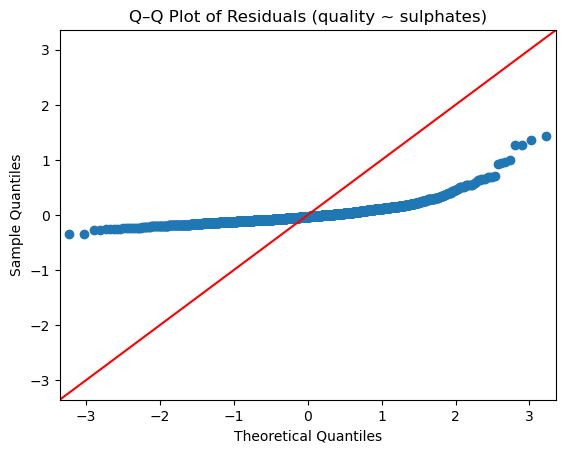

In [114]:
sm.qqplot(residuals, line='45')
plt.title("Q–Q Plot of Residuals (quality ~ sulphates)")
plt.show()

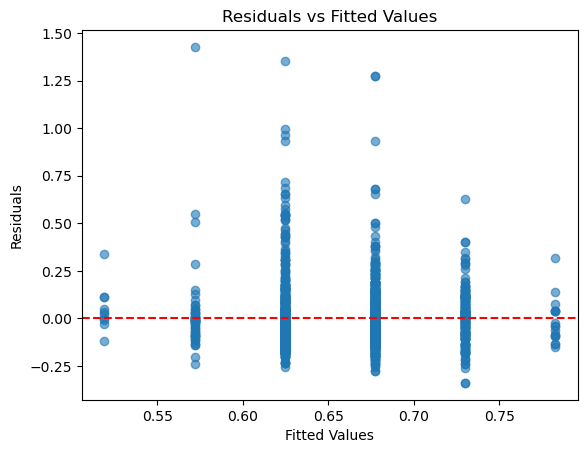

In [115]:

plt.scatter(model.fittedvalues, model.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

### Limitations
* We are fitting a multiple regression to a **ordinal catagorical** variable. Linear regression may predict 'impossible' values such as 6.75 etc and predict outside of our range of possible values.
* We can use tree based models or some variation of logistic regression in the future to handle this

# White wine